In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import mysql.connector as mysql
import warnings
import contextlib


warnings.filterwarnings("ignore")

In [2]:
user = os.environ.get('USER')
password = os.environ.get('PASSWORD')
host = os.environ.get('HOST')
database = os.environ.get('DATABASE')

In [3]:
with open('../sql/analysis.sql', 'r') as f:
    query = f.read()

In [4]:
with mysql.connect(user=user, password=password, host=host, database=database) as conn:
    
    data = pd.read_sql(query, conn)

In [5]:
data.head()

,id_wycieczki,ilosc_uczestnikow,kwota,ilosc_dni,miasto,kraj,tematyka,data_rozpoczecia
0,745,8,43282.80,17,Wenecja,Włochy,Zawody w tłumaczeniu języka pingwinów,2015-08-24
1,547,12,39578.18,11,Rijeka,Chorwacja,Zawody w liczeniu kropli deszczu,2018-07-26
2,699,8,37782.96,15,Kraków,Polska,Zawody w liczeniu kropli deszczu,2024-03-28
3,1614,11,35020.75,10,Neapol,Włochy,Parkur po cudzych balkonach,2022-08-20
4,793,9,30459.95,11,Zagrzeb,Chorwacja,Parkur po cudzych balkonach,2021-07-14


In [6]:
data['kwota_na_osobe_na_dzien'] = data['kwota'] / (data['ilosc_uczestnikow'] * data['ilosc_dni'])


In [7]:
sns.set_theme(style="dark")

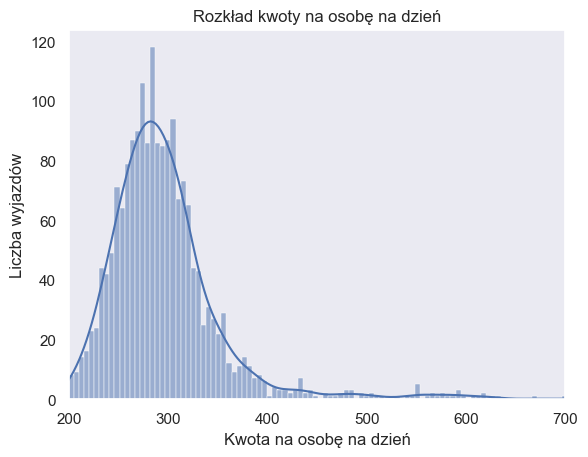

In [8]:
with contextlib.redirect_stdout(open(os.devnull, 'w')):
    ax = sns.histplot(data=data, x='kwota_na_osobe_na_dzien', kde=True, bins=100)
    plt.xlim(200, 700)
    ax.set(xlabel='Kwota na osobę na dzień', ylabel='Liczba wyjazdów')
    ax.set_title('Rozkład kwoty na osobę na dzień')


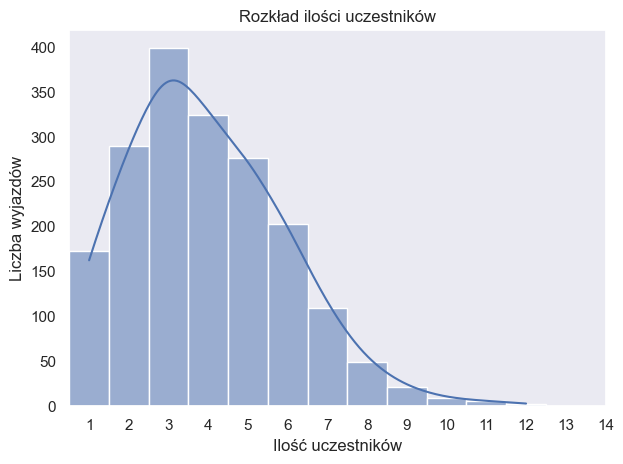

In [9]:
with contextlib.redirect_stdout(open(os.devnull, 'w')):
   ax = sns.histplot(data=data, x='ilosc_uczestnikow', kde=True, discrete=True, kde_kws={'bw_adjust': 1.5}, bins=len(data['ilosc_uczestnikow'].unique()))
   ax.set_xlim(0.5,14)
   plt.xticks(np.arange(1, 15, 1), labels=np.arange(1, 15, 1))
   ax.set(xlabel='Ilość uczestników', ylabel='Liczba wyjazdów')
   ax.set_title('Rozkład ilości uczestników')
   plt.tight_layout()  

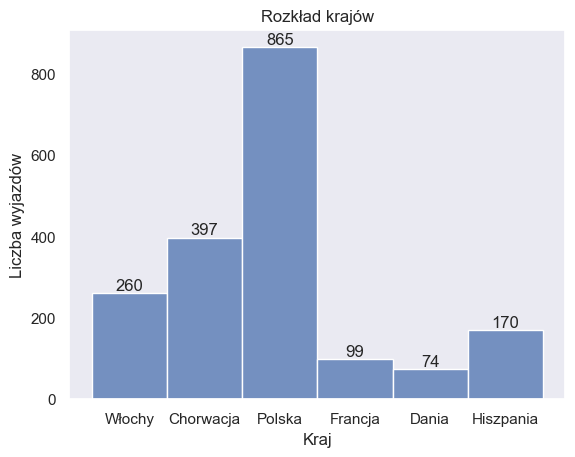

In [10]:
with contextlib.redirect_stdout(open(os.devnull, 'w')):
    ax = sns.histplot(x='kraj', data=data)
    ax.set(xlabel='Kraj', ylabel='Liczba wyjazdów')
    ax.bar_label(ax.containers[0])
    ax.set_title('Rozkład krajów')

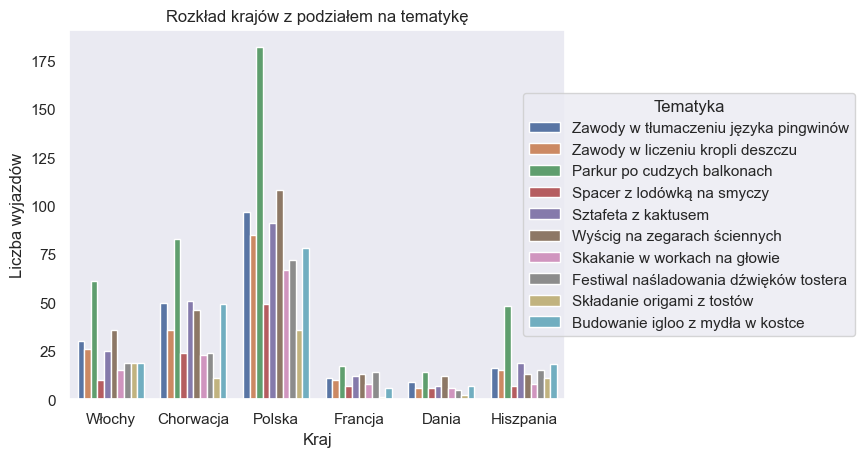

In [11]:

with contextlib.redirect_stdout(open(os.devnull, 'w')):
    ax = sns.countplot(x='kraj', data=data, hue='tematyka', palette='deep')


    ax.legend(title='Tematyka', loc='center right', bbox_to_anchor=(1.6, 0.5))
    ax.set(xlabel='Kraj', ylabel='Liczba wyjazdów')
    ax.set_title('Rozkład krajów z podziałem na tematykę')

In [14]:
with open('../sql/employee.sql', 'r') as f:
    employee_query = f.read()


with mysql.connect(user=user, password=password, host=host, database=database) as conn:
    
    employee_data = pd.read_sql(employee_query, conn)

In [15]:
employee_data.head()

,imie_i_nazwiako,data_zatrudnienia,stanowisko,wynagrodzenie
0,ElżbietaHaremza,2023-12-04,Przewodnik,6140.0
1,MariuszKrajniak,2022-01-22,Przewodnik,7500.0
2,AnastazjaKorzekwa,2022-04-07,Kierownik,7360.0
3,TomaszLaszczyk,2022-04-14,Zastępca Kierownika,6300.0
4,MariuszDomek,2022-04-06,Agent Biura Podróży,7340.0


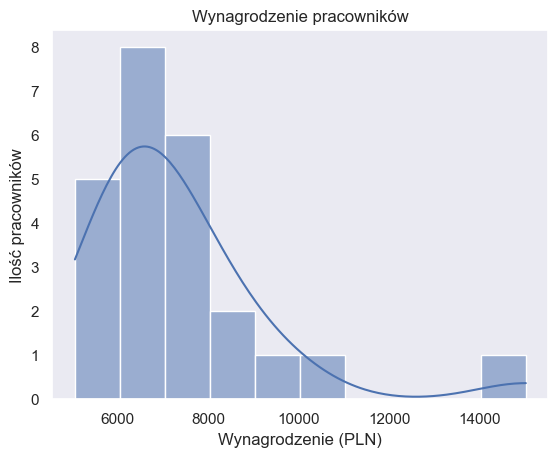

In [25]:
with contextlib.redirect_stdout(open(os.devnull, 'w')):

    ax = sns.histplot(data=employee_data, x='wynagrodzenie', kde=True, bins=10)
    ax.set(xlabel='Wynagrodzenie (PLN)', ylabel='Ilość pracowników')
    ax.set_title('Wynagrodzenie pracowników')